In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/hayasakaist/Trajectory_Optimization/coordinate.py:274: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  v_r = nr.dot(v_eci)
/home/hayasakaist/Trajectory_Optimization/coordinate.py:282: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, C))
  inclination_rad = acos(c1_eci.dot(np.array([0.0,0.0,1.0])))
/home/hayasakaist/Trajectory_Optimization/coordinate.py:287: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, C), array(float64, 1d, A))
  argument_perigee = acos(n_eci.dot(normalize(f_eci)))
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/o

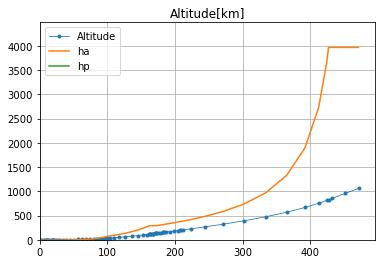

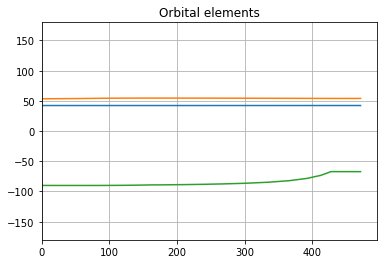

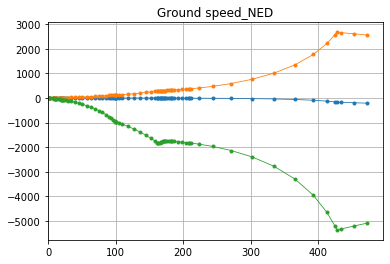

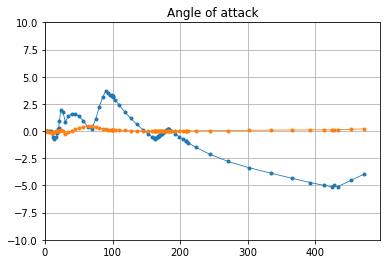

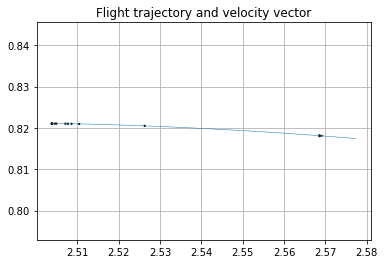

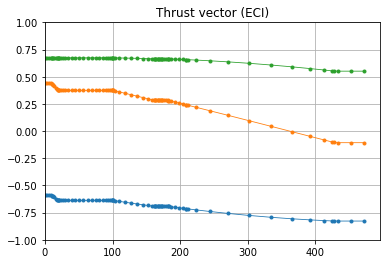

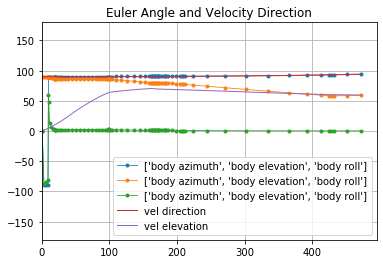

number of variables             : 771
number of equality constraints  : 676
number of inequality constraints: 169

List of user-set options:

                                    Name   Value                used
                        file_print_level = 5                     yes
                   hessian_approximation = limited-memory        yes
                           linear_solver = pardisomkl            yes
                                max_iter = 500                   yes
                             output_file = Zero-3DoF_2022-03-09-221700_pyIPOPT.out  yes
                             print_level = 3                     yes
                 print_timing_statistics = yes                   yes
                      print_user_options = yes                   yes
                                      sb = yes                   yes
                                     tol = 1e-10                 yes
Total number of variables............................:      771
                

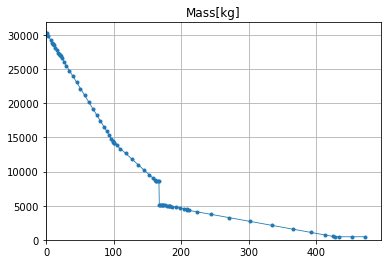

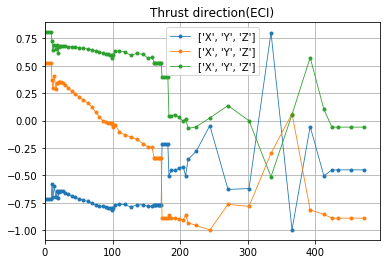

In [2]:
%run -i Trajectory_Optimization_3DoF.py Zero-3DoF

/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


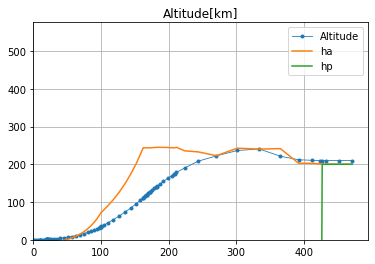

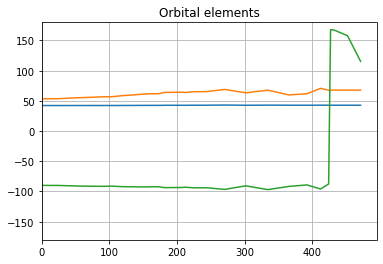

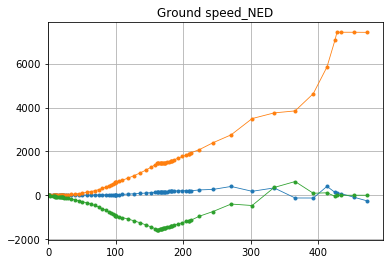

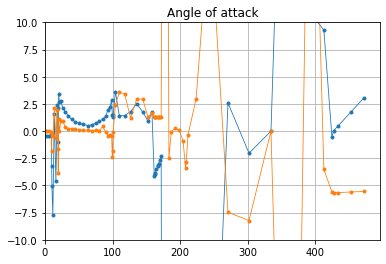

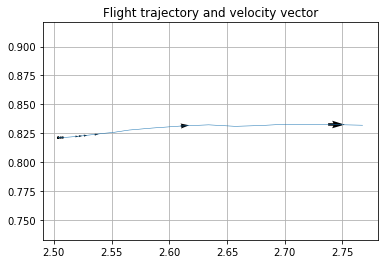

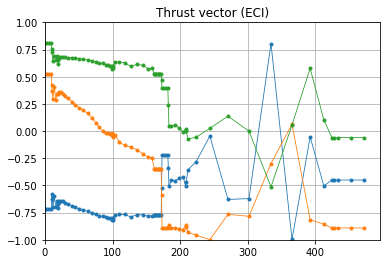

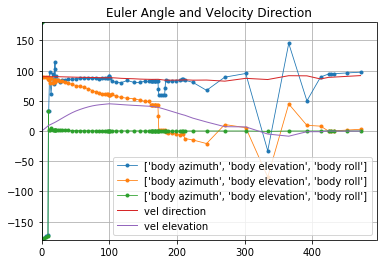

In [3]:
display_6DoF(out)

In [4]:
out.loc[:,["time","heading","pitch","roll"]].to_csv("../RocketSim/bin/input/OptResult-Attitude.csv",index=None)

In [4]:
ref = pd.read_csv("ALMA/ZERO_NOMINAL_2201.csv",skiprows=[0,1,2])

In [5]:
df = pd.read_csv("../RocketSim/bin/output/OptResult-out.csv")

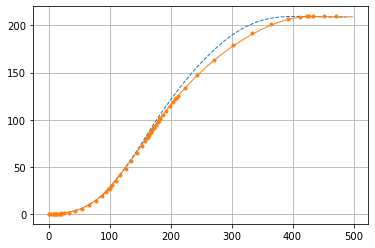

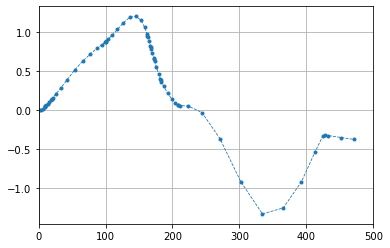

In [6]:
plt.plot(ref["time"],ref["h"],"--",lw=1)
plt.plot(out["time"],out["alt"],".")
plt.plot(df["time"],df["alt"],c="C1",lw=1)
plt.grid()

df1  = np.interp(out["time"], df["time"], df["alt"])
plt.figure()
plt.plot(out["time"], df1-out["alt"], ".--", lw=0.8)
plt.xlim([0,500])
plt.grid()

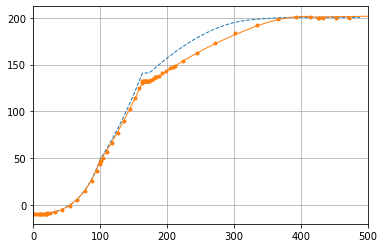

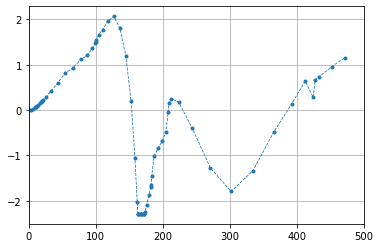

In [7]:
plt.plot(ref["time"], ref["ha"], "--",lw=1)
plt.plot(out["time"], out["ha"],".")
plt.plot(df["time"], df["ha"],c="C1",lw=1)
plt.xlim([0,500])
plt.ylim([-20,None])
plt.grid()

df1  = np.interp(out["time"], df["time"], df["ha"])
plt.figure()
plt.plot(out["time"], df1-out["ha"], ".--", lw=0.8)
plt.xlim([0,500])
plt.grid()

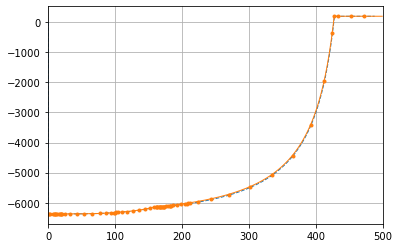

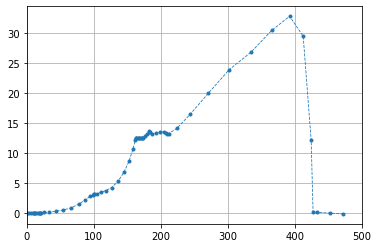

In [8]:
plt.plot(ref["time"], ref["hp"], "--",lw=1)
plt.plot(out["time"], out["hp"],".")
plt.plot(df["time"], df["hp"],c="C1",lw=1)
plt.xlim([0,500])
plt.grid()

df1  = np.interp(out["time"], df["time"], df["hp"])
plt.figure()
plt.plot(out["time"], df1-out["hp"], ".--", lw=0.8)
plt.xlim([0,500])
plt.grid()

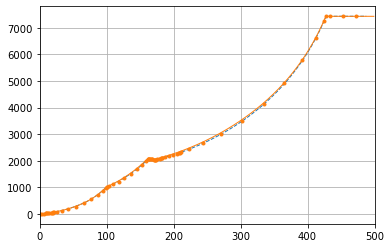

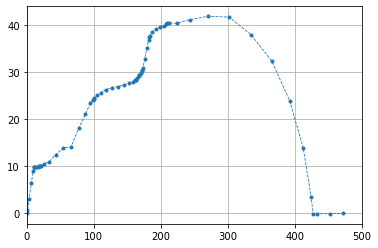

In [9]:
plt.plot(ref["time"],ref["vr"],"--",lw=1)
plt.plot(out["time"],out["vr"],".")
plt.plot(df["time"],df["vel_ground"],c="C1",lw=1)
plt.xlim([0,500])
plt.grid()

df1  = np.interp(out["time"], df["time"], df["vel_ground"])
plt.figure()
plt.plot(out["time"], df1-out["vr"], ".--", lw=0.8)
plt.xlim([0,500])
plt.grid()

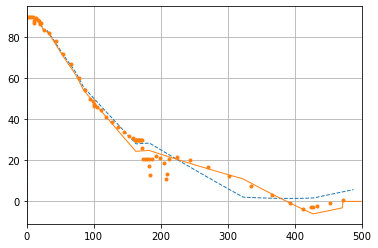

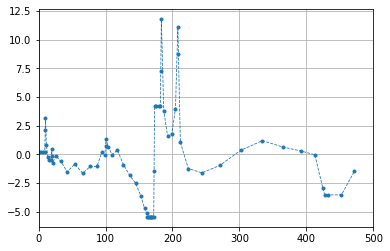

In [10]:
plt.plot(ref["time"],ref["eularGDB[1]"],"--",lw=1)
plt.plot(out["time"],out["pitch"],".")
plt.plot(df["time"],df["pitch"].to_numpy('f8'),c="C1",lw=1)
plt.xlim([0,500])
plt.grid()

df1  = np.interp(out["time"], df["time"], df["pitch"])
plt.figure()
plt.plot(out["time"], df1-out["pitch"], ".--", lw=0.8)
plt.xlim([0,500])
plt.grid()

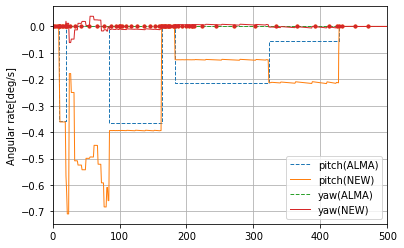

In [11]:
plt.plot(ref["time"],ref["Q"],"--",lw=1,label="pitch(ALMA)")
plt.plot(out["time"],out["rate_Q"],".")
plt.plot(df["time"],df["rate_Q"]*180/np.pi,c="C1",lw=1,label="pitch(NEW)")
plt.plot(ref["time"],ref["R"],"--",lw=1,label="yaw(ALMA)")
plt.plot(out["time"],out["rate_R"],".")
plt.plot(df["time"],df["rate_R"]*180/np.pi,c="C3",lw=1,label="yaw(NEW)")

plt.xlim([0,500])
plt.ylabel("Angular rate[deg/s]")
plt.legend()
plt.grid()

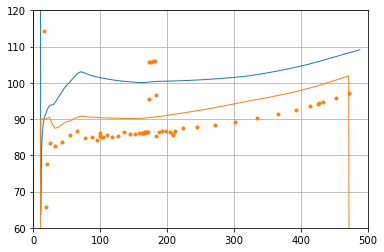

In [12]:
plt.plot(ref["time"],ref["eularGDB[2]"],lw=1)
plt.plot(out["time"],out["heading"],".")
plt.plot(df["time"],df["heading"].to_numpy('f8'),c="C1",lw=1)
plt.xlim([0,500])
plt.ylim([60,120])
plt.grid()

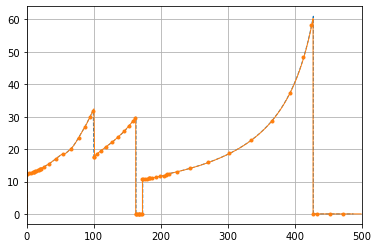

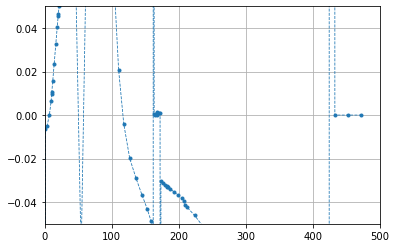

In [13]:
plt.plot(ref["time"],ref["axb"],"--",lw=1)
plt.plot(out["time"],out["accel_X"],".")
plt.plot(df["time"],df["acc_BODY_X"],c="C1",lw=1)
plt.xlim([0,500])
plt.grid()

df1  = np.interp(out["time"], df["time"], df["acc_BODY_X"])
plt.figure()
plt.plot(out["time"], df1-out["accel_X"], ".--", lw=0.8)
plt.xlim([0,500])
plt.ylim([-0.05,0.05])
plt.grid()

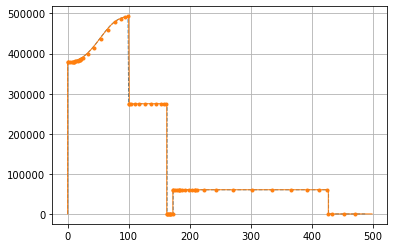

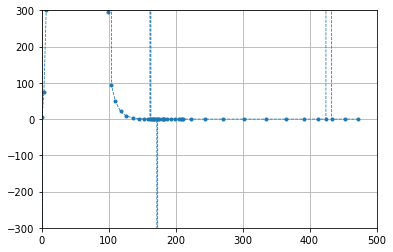

In [14]:
plt.plot(ref["time"],ref["Fr"],"--",lw=1)
plt.plot(out["time"],out["thrust"],".")
plt.plot(df["time"],df["thrust"],c="C1",lw=1)
plt.grid()

df1  = np.interp(out["time"], df["time"], df["thrust"])
plt.figure()
plt.plot(out["time"], df1-out["thrust"], ".--", lw=0.8)
plt.xlim([0,500])
plt.ylim([-300,300])
plt.grid()

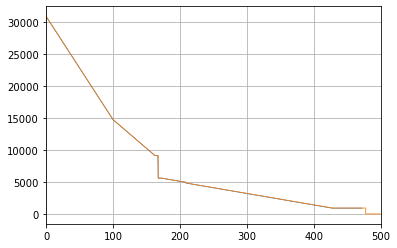

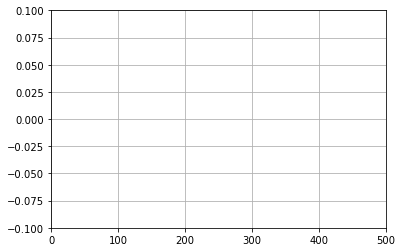

In [15]:
#plt.plot(ref["time"],ref["weight"])
plt.plot(out["time"],out["mass"],lw=0.8)
plt.plot(df["time"],df["total mass"],lw=0.8)
plt.xlim([0,500])
plt.grid()

df1  = np.interp(out["time"], df["time"], df["total mass"])
plt.figure()
plt.plot(out["time"], df1-out["mass"], ".--", lw=0.8)
plt.xlim([0,500])
plt.ylim([-0.1,0.1])
plt.grid()

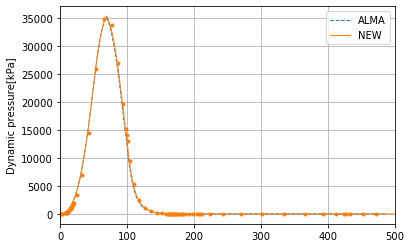

In [16]:
plt.plot(ref["time"],ref["q"],"--",lw=1,label="ALMA")
plt.plot(out["time"],out["q"],".")
plt.plot(df["time"],df["q"],c="C1",lw=1,label="NEW")
plt.xlim([0,500])
plt.ylabel("Dynamic pressure[kPa]")
plt.legend()
plt.grid()

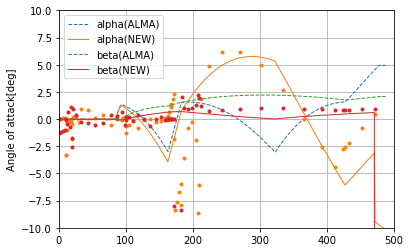

In [17]:
plt.plot(ref["time"],ref["alpha"],"--",lw=1,label="alpha(ALMA)")
plt.plot(out["time"],out["aoa_alpha"],".")
plt.plot(df["time"],df["aoa_alpha"],c="C1",lw=1,label="alpha(NEW)")
plt.plot(ref["time"],ref["beta"],"--",lw=1,label="beta(ALMA)")
plt.plot(out["time"],out["aoa_beta"],".")
plt.plot(df["time"],df["aoa_beta"],c="C3",lw=1,label="beta(NEW)")

plt.xlim([0,500])
plt.ylim([-10,10])
plt.legend()
plt.ylabel("Angle of attack[deg]")
plt.grid()

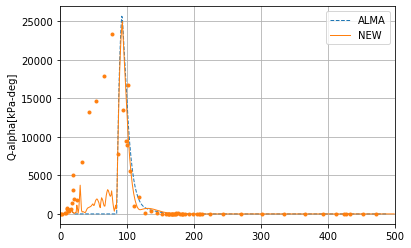

In [18]:
plt.plot(ref["time"],ref["alphaq"],"--",lw=1,label="ALMA")
plt.plot(out["time"],out["q"]*out["aoa_total"],".")
plt.plot(df["time"],df["q"]*df["aoa_total"],c="C1",lw=1,label="NEW")
plt.xlim([0,500])
plt.ylabel("Q-alpha[kPa-deg]")
plt.legend()
plt.grid()